In [1]:
# Telecom Churn Prediction with K-Nearest Neighbors (KNN)
# 
# This analysis focuses on predicting customer churn in the telecom industry.
# By utilizing the K-Nearest Neighbors (KNN) algorithm, we explore how varying
# the number of neighbors (K) affects model accuracy. 
#
# Dataset: The data used here consists of various telecom customer features, including
# demographic details, service usage, and customer status (Churn or No Churn).
# 
# Steps:
# 1. Data preparation by splitting features and target values.
# 2. Training and testing split with a 70-30 ratio and stratified sampling.
# 3. KNN model is trained on different values of K to observe performance.
# 4. Visualization of training and test accuracy to help choose the optimal K.
#
# Objective: To identify the best K-value that provides a balance between
# training and test accuracy, thus minimizing underfitting or overfitting.


In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("telecom_churn.csv")

In [8]:
# removing output(target) column and assign the rest data set values to X variable

In [9]:
X = df.drop("Churn",axis=1).values
X

array([[128.  ,   1.  ,   1.  , ...,  89.  ,   9.87,  10.  ],
       [107.  ,   1.  ,   1.  , ...,  82.  ,   9.78,  13.7 ],
       [137.  ,   1.  ,   0.  , ...,  52.  ,   6.06,  12.2 ],
       ...,
       [ 28.  ,   1.  ,   0.  , ...,  56.  ,  14.44,  14.1 ],
       [184.  ,   0.  ,   0.  , ...,  50.  ,   7.98,   5.  ],
       [ 74.  ,   1.  ,   1.  , ..., 100.  ,  13.3 ,  13.7 ]])

In [10]:
# assigning output(target) column values to y variable

In [11]:
y = df["Churn"].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
# Splitting the data into training and test data sets

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=17,stratify=y)

In [14]:
# Fitting knn and testing accuracy of model on different number of K

In [15]:
train_accuracy={}

In [16]:
test_accuracy={}

In [17]:
neighbors = np.arange(1,21)

In [18]:
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train,y_train)
    train_accuracy[neighbor] = knn.score(X_train,y_train)
    test_accuracy[neighbor] = knn.score(X_test,y_test)

In [19]:
# Plotting Training and Test Accuracy for Different K Values
# 
# This plot shows how the accuracy of the K-Nearest Neighbors (KNN) model
# changes as the number of neighbors (K) varies from 1 to 15. 
# It helps in selecting the optimal K by comparing training and test accuracy.
# A high training accuracy but low test accuracy can indicate overfitting,
# while similar training and test accuracies suggest a more generalized model.

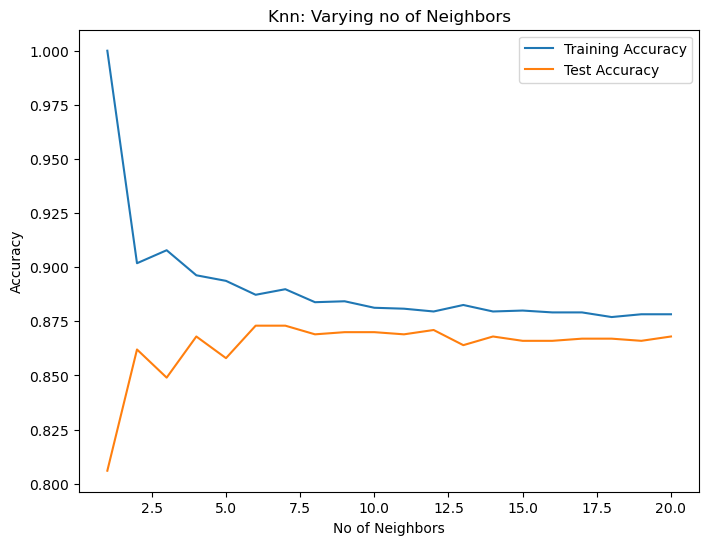

In [20]:
plt.figure(figsize=(8,6))
plt.title("Knn: Varying no of Neighbors")
plt.plot(neighbors,train_accuracy.values(),label="Training Accuracy")
plt.plot(neighbors,test_accuracy.values(),label="Test Accuracy")
plt.legend()
plt.xlabel("No of Neighbors")
plt.ylabel("Accuracy")
plt.show()
